In [2]:
# G1 Capstone Project_Stat

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
retail_df = pd.read_csv('synthetic_retail_data.csv')
print(retail_df.head())

   InvoiceNo CustomerID      Date ProductCategory  Quantity  UnitPrice  \
0  INV105646   CUST1810  1/1/2023            Home         7      67.88   
1  INV105099   CUST1530  1/1/2023            Toys         6      24.22   
2  INV102818   CUST1701  1/1/2023     Electronics         6     158.78   
3  INV107351   CUST1323  1/1/2023     Electronics         5     102.23   
4  INV108415   CUST1406  1/1/2023     Electronics         8      62.32   

   DiscountApplied  ReviewRating  IsFirstPurchase MarketingChannel  ...  \
0             44.6           4.0                0          Organic  ...   
1              0.0           2.0                1           Social  ...   
2             25.9           5.0                1            Email  ...   
3             39.0           3.0                1           Social  ...   
4             26.7           4.0                0            Email  ...   

  ItemsInCart  PreviousSpending  BrowsingSessions  TotalAmount  Unnamed: 17  \
0           7            

In [5]:
print(retail_df.info())
print(retail_df.describe().T)
print(retail_df.isnull().sum())
print(retail_df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         9500 non-null   object 
 1   CustomerID        9500 non-null   object 
 2   Date              9500 non-null   object 
 3   ProductCategory   9500 non-null   object 
 4   Quantity          9500 non-null   int64  
 5   UnitPrice         9500 non-null   float64
 6   DiscountApplied   9500 non-null   float64
 7   ReviewRating      7835 non-null   float64
 8   IsFirstPurchase   9500 non-null   int64  
 9   MarketingChannel  9028 non-null   object 
 10  Country           9500 non-null   object 
 11  TimeOnSite        9025 non-null   float64
 12  ShippingCost      9500 non-null   float64
 13  ItemsInCart       9500 non-null   int64  
 14  PreviousSpending  9500 non-null   float64
 15  BrowsingSessions  9500 non-null   int64  
 16  TotalAmount       9500 non-null   float64


Import and examine the dataset.
Identify missing values and apply appropriate treatment.
Detect and address outliers in dataset.
Prepare data for analysis and modeling.

Dropping duplicates (if any)

In [6]:
retail_df.drop_duplicates(inplace=True)

In [7]:
print(retail_df.describe().T)

                   count        mean          std    min       25%        50%  \
Quantity          9500.0    9.166105     5.267773   1.00    6.0000    9.00000   
UnitPrice         9500.0   58.459586    42.140771  10.06   31.3500   43.67500   
DiscountApplied   9500.0   18.181400    18.531475   0.00    0.0000   13.60000   
ReviewRating      7835.0    3.481302     1.062269   1.00    3.0000    4.00000   
IsFirstPurchase   9500.0    0.302842     0.459512   0.00    0.0000    0.00000   
TimeOnSite        9025.0  299.567878   118.555281  30.00  218.9000  296.80000   
ShippingCost      9500.0   10.041306     4.875580   0.00    6.6300    9.96000   
ItemsInCart       9500.0    9.671474     3.528830   1.00    7.0000    9.00000   
PreviousSpending  9500.0  209.090296   161.318720   0.00    0.0000  241.93000   
BrowsingSessions  9500.0    3.064737     1.440587   1.00    2.0000    3.00000   
TotalAmount       9500.0  484.463016   940.646765  20.26  199.9175  309.13500   
Unnamed: 17          0.0    

In [8]:
print(retail_df.columns)

Index(['InvoiceNo', 'CustomerID', 'Date', 'ProductCategory', 'Quantity',
       'UnitPrice', 'DiscountApplied', 'ReviewRating', 'IsFirstPurchase',
       'MarketingChannel', 'Country', 'TimeOnSite', 'ShippingCost',
       'ItemsInCart', 'PreviousSpending', 'BrowsingSessions', 'TotalAmount',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


In [9]:
print(retail_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         9500 non-null   object 
 1   CustomerID        9500 non-null   object 
 2   Date              9500 non-null   object 
 3   ProductCategory   9500 non-null   object 
 4   Quantity          9500 non-null   int64  
 5   UnitPrice         9500 non-null   float64
 6   DiscountApplied   9500 non-null   float64
 7   ReviewRating      7835 non-null   float64
 8   IsFirstPurchase   9500 non-null   int64  
 9   MarketingChannel  9028 non-null   object 
 10  Country           9500 non-null   object 
 11  TimeOnSite        9025 non-null   float64
 12  ShippingCost      9500 non-null   float64
 13  ItemsInCart       9500 non-null   int64  
 14  PreviousSpending  9500 non-null   float64
 15  BrowsingSessions  9500 non-null   int64  
 16  TotalAmount       9500 non-null   float64


In [10]:
print(retail_df.isnull().sum())

InvoiceNo              0
CustomerID             0
Date                   0
ProductCategory        0
Quantity               0
UnitPrice              0
DiscountApplied        0
ReviewRating        1665
IsFirstPurchase        0
MarketingChannel     472
Country                0
TimeOnSite           475
ShippingCost           0
ItemsInCart            0
PreviousSpending       0
BrowsingSessions       0
TotalAmount            0
Unnamed: 17         9500
Unnamed: 18         8271
Unnamed: 19         9500
Unnamed: 20         8271
Unnamed: 21         8271
Unnamed: 22         8271
dtype: int64


In [11]:
# printing variables with missing values
missing_col = [col for col in retail_df.columns if retail_df[col].isnull().sum()>0]
print(missing_col)

['ReviewRating', 'MarketingChannel', 'TimeOnSite', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22']


In [12]:
# printing variables with no value
no_value_col = [col for col in retail_df.columns if retail_df[col].isnull().sum()==retail_df.shape[0]]
print(no_value_col)

['Unnamed: 17', 'Unnamed: 19']


In [13]:
# remove the two columns with no values
retail_df.drop(columns=no_value_col, inplace=True)

In [14]:
print(retail_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         9500 non-null   object 
 1   CustomerID        9500 non-null   object 
 2   Date              9500 non-null   object 
 3   ProductCategory   9500 non-null   object 
 4   Quantity          9500 non-null   int64  
 5   UnitPrice         9500 non-null   float64
 6   DiscountApplied   9500 non-null   float64
 7   ReviewRating      7835 non-null   float64
 8   IsFirstPurchase   9500 non-null   int64  
 9   MarketingChannel  9028 non-null   object 
 10  Country           9500 non-null   object 
 11  TimeOnSite        9025 non-null   float64
 12  ShippingCost      9500 non-null   float64
 13  ItemsInCart       9500 non-null   int64  
 14  PreviousSpending  9500 non-null   float64
 15  BrowsingSessions  9500 non-null   int64  
 16  TotalAmount       9500 non-null   float64


In [15]:
#list of variables with missing values with total number of missing values 
missing_col = {col: retail_df[col].isnull().sum() for col in retail_df.columns if retail_df[col].isnull().sum()>0}
print(missing_col)

{'ReviewRating': np.int64(1665), 'MarketingChannel': np.int64(472), 'TimeOnSite': np.int64(475), 'Unnamed: 18': np.int64(8271), 'Unnamed: 20': np.int64(8271), 'Unnamed: 21': np.int64(8271), 'Unnamed: 22': np.int64(8271)}


Considering the size of the data, four of which doesn't seem to have adequate sample size. I believe we can exclude it from the analysis. (unnamed 18, 20, 21, 22)

In [16]:
# removme columns with too many missing values
retail_df.drop(columns=['Unnamed: 18', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22'], inplace=True)
print(retail_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9500 entries, 0 to 9499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   InvoiceNo         9500 non-null   object 
 1   CustomerID        9500 non-null   object 
 2   Date              9500 non-null   object 
 3   ProductCategory   9500 non-null   object 
 4   Quantity          9500 non-null   int64  
 5   UnitPrice         9500 non-null   float64
 6   DiscountApplied   9500 non-null   float64
 7   ReviewRating      7835 non-null   float64
 8   IsFirstPurchase   9500 non-null   int64  
 9   MarketingChannel  9028 non-null   object 
 10  Country           9500 non-null   object 
 11  TimeOnSite        9025 non-null   float64
 12  ShippingCost      9500 non-null   float64
 13  ItemsInCart       9500 non-null   int64  
 14  PreviousSpending  9500 non-null   float64
 15  BrowsingSessions  9500 non-null   int64  
 16  TotalAmount       9500 non-null   float64


In [17]:
final_missing_col = {col: retail_df[col].isnull().sum() for col in retail_df.columns if retail_df[col].isnull().sum()>0}
print(final_missing_col)

{'ReviewRating': np.int64(1665), 'MarketingChannel': np.int64(472), 'TimeOnSite': np.int64(475)}


In [18]:
# print characteristic of the three columns with missing values
print(retail_df['ReviewRating'].describe())
print(retail_df['MarketingChannel'].describe()) 
print(retail_df['TimeOnSite'].describe())     

count    7835.000000
mean        3.481302
std         1.062269
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: ReviewRating, dtype: float64
count      9028
unique        5
top       Email
freq       2768
Name: MarketingChannel, dtype: object
count    9025.000000
mean      299.567878
std       118.555281
min        30.000000
25%       218.900000
50%       296.800000
75%       379.800000
max       739.100000
Name: TimeOnSite, dtype: float64


In [19]:
print(retail_df['ReviewRating'].describe())
print(retail_df['ReviewRating'].info())
print("Mode", retail_df['ReviewRating'].mode())
print("Median", retail_df['ReviewRating'].median())


count    7835.000000
mean        3.481302
std         1.062269
min         1.000000
25%         3.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: ReviewRating, dtype: float64
<class 'pandas.core.series.Series'>
RangeIndex: 9500 entries, 0 to 9499
Series name: ReviewRating
Non-Null Count  Dtype  
--------------  -----  
7835 non-null   float64
dtypes: float64(1)
memory usage: 74.3 KB
None
Mode 0    4.0
Name: ReviewRating, dtype: float64
Median 4.0


In [20]:
# Both median and mode are 4.0. We will replace the missing values with 4.0 in Review rating. 
retail_df['ReviewRating'].fillna(4.0)

0       4.0
1       2.0
2       5.0
3       3.0
4       4.0
       ... 
9495    4.0
9496    4.0
9497    4.0
9498    4.0
9499    3.0
Name: ReviewRating, Length: 9500, dtype: float64

In [21]:
print(retail_df["ReviewRating"].isnull().sum())

1665


In [22]:
print(retail_df["ReviewRating"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 9500 entries, 0 to 9499
Series name: ReviewRating
Non-Null Count  Dtype  
--------------  -----  
7835 non-null   float64
dtypes: float64(1)
memory usage: 74.3 KB
None


In [23]:
print(retail_df["MarketingChannel"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 9500 entries, 0 to 9499
Series name: MarketingChannel
Non-Null Count  Dtype 
--------------  ----- 
9028 non-null   object
dtypes: object(1)
memory usage: 74.3+ KB
None


In [24]:
print(retail_df["MarketingChannel"].describe())

count      9028
unique        5
top       Email
freq       2768
Name: MarketingChannel, dtype: object


In [25]:
print(retail_df["MarketingChannel"].mode())

0    Email
Name: MarketingChannel, dtype: object


In [26]:
# replace missing value with mode "Email" in MarketingChannel
retail_df["MarketingChannel"]= retail_df["MarketingChannel"].fillna("Email")


In [27]:
print(retail_df["TimeOnSite"].info())
print(retail_df["TimeOnSite"].describe())
print(retail_df["TimeOnSite"].mode())

<class 'pandas.core.series.Series'>
RangeIndex: 9500 entries, 0 to 9499
Series name: TimeOnSite
Non-Null Count  Dtype  
--------------  -----  
9025 non-null   float64
dtypes: float64(1)
memory usage: 74.3 KB
None
count    9025.000000
mean      299.567878
std       118.555281
min        30.000000
25%       218.900000
50%       296.800000
75%       379.800000
max       739.100000
Name: TimeOnSite, dtype: float64
0    30.0
Name: TimeOnSite, dtype: float64


In [28]:
# calculate median and mode of TimeOnSite
print(retail_df["TimeOnSite"].median())
print(retail_df["TimeOnSite"].mode())

296.8
0    30.0
Name: TimeOnSite, dtype: float64


In [29]:
# we will replace the missing value with mean of the column inplace of it
retail_df["TimeOnSite"]=  retail_df["TimeOnSite"].fillna(retail_df["TimeOnSite"].mean())

In [30]:
#check if there is any missing value remaining 
print(retail_df.isnull().sum())

InvoiceNo              0
CustomerID             0
Date                   0
ProductCategory        0
Quantity               0
UnitPrice              0
DiscountApplied        0
ReviewRating        1665
IsFirstPurchase        0
MarketingChannel       0
Country                0
TimeOnSite             0
ShippingCost           0
ItemsInCart            0
PreviousSpending       0
BrowsingSessions       0
TotalAmount            0
dtype: int64


Detect and address outliers in dataset.
Prepare data for analysis and modeling.
Descriptive Statistics & Exploratory Analysis
Compute summary statistics (mean, median, mode, variance, standard deviation, IQR).
Generate distribution plots (histograms, boxplots, scatterplots).

In [31]:
# Outlier Detection and Treatment
numeric_cols = retail_df.select_dtypes(include=np.number).columns.tolist()
print(numeric_cols)

['Quantity', 'UnitPrice', 'DiscountApplied', 'ReviewRating', 'IsFirstPurchase', 'TimeOnSite', 'ShippingCost', 'ItemsInCart', 'PreviousSpending', 'BrowsingSessions', 'TotalAmount']


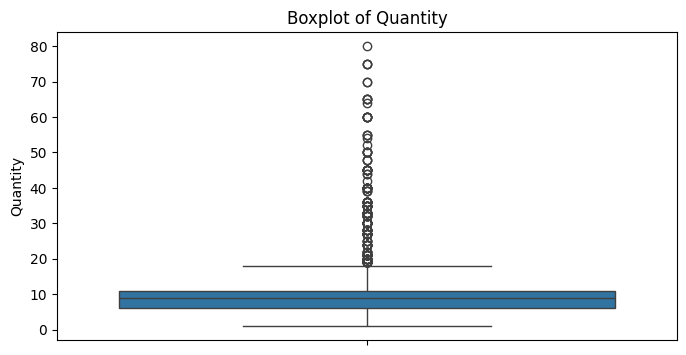

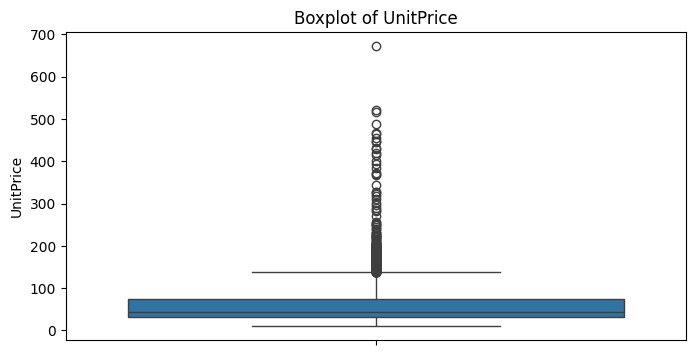

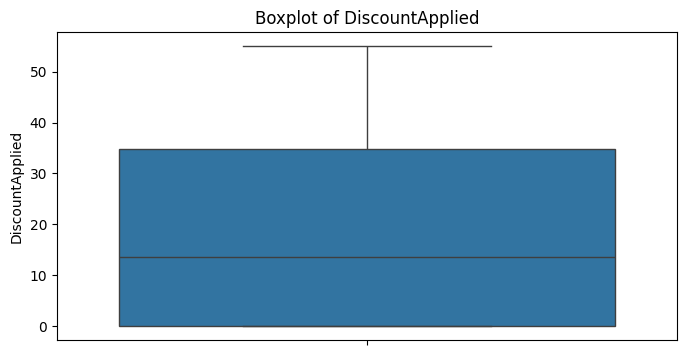

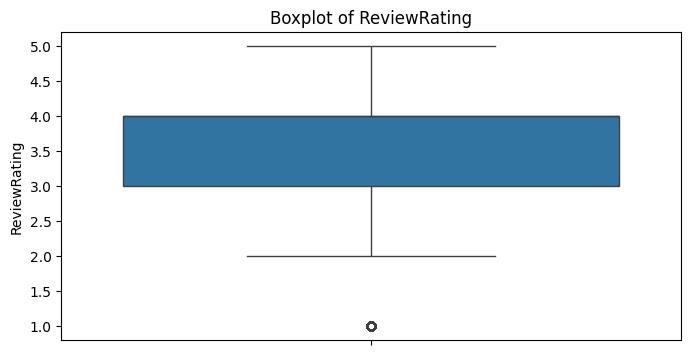

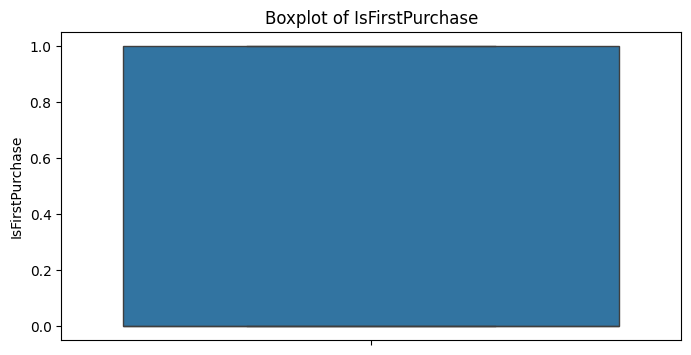

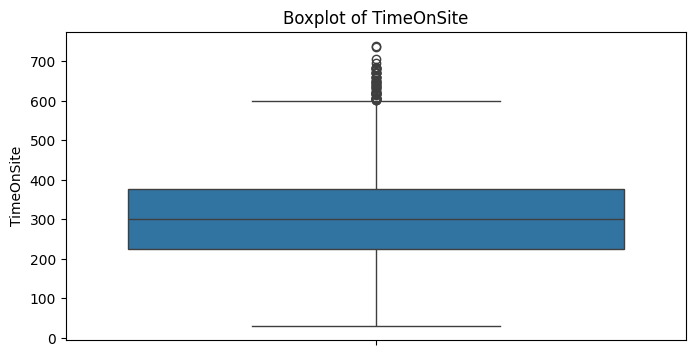

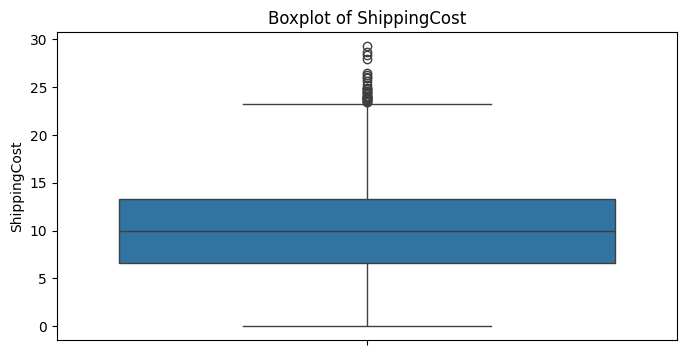

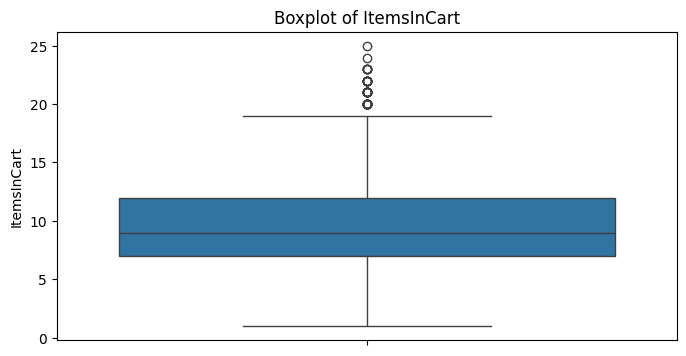

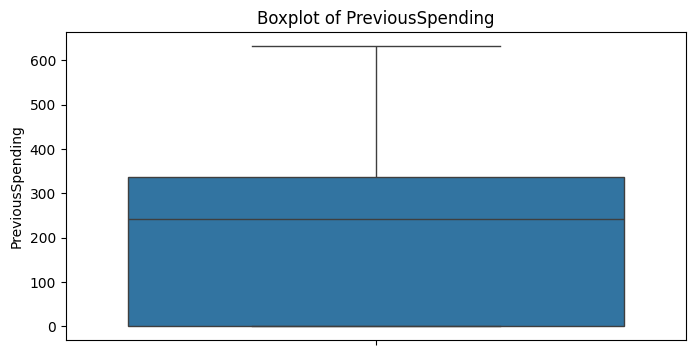

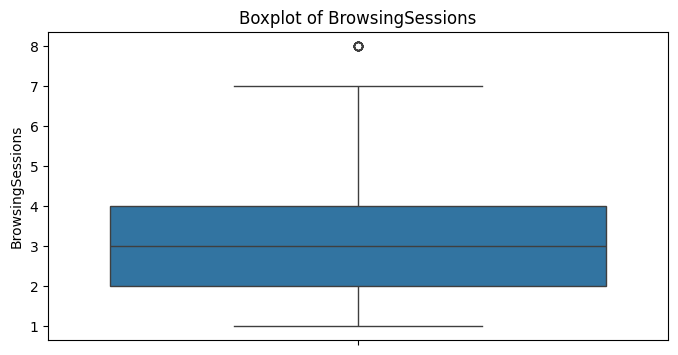

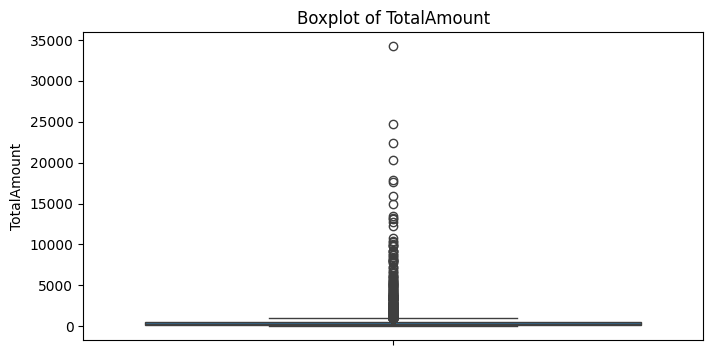

In [32]:
# boxplot for numerical columns
for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(y=retail_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [37]:
#for numberical variables , calculate mean, median, mode, Q1, Q3, IQR, lower bound and upper bound, standard deviation, variance  
numeric_cols = ['Quantity', 'UnitPrice', 'DiscountApplied', 'ReviewRating', 'IsFirstPurchase', 'TimeOnSite', 'ShippingCost', 'ItemsInCart', 'PreviousSpending', 'BrowsingSessions', 'TotalAmount']
for col in numeric_cols:
    mean = retail_df[col].mean()
    median = retail_df[col].median()
    mode = retail_df[col].mode()[0]
    Q1 = retail_df[col].quantile(0.25)
    Q3 = retail_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    std_dev = retail_df[col].std()
    variance = retail_df[col].var()
    
    print(f'Statistics for {col}:')
    print(f'Mean: {mean}')
    print(f'Median: {median}')
    print(f'Mode: {mode}')
    print(f'Q1: {Q1}')
    print(f'Q3: {Q3}')
    print(f'IQR: {IQR}')
    print(f'Lower Bound: {lower_bound}')
    print(f'Upper Bound: {upper_bound}')
    print(f'Standard Deviation: {std_dev}')
    print(f'Variance: {variance}')
    print('\n')#

Statistics for Quantity:
Mean: 9.166105263157895
Median: 9.0
Mode: 9
Q1: 6.0
Q3: 11.0
IQR: 5.0
Lower Bound: -1.5
Upper Bound: 18.5
Standard Deviation: 5.26777327700219
Variance: 27.749435297898394


Statistics for UnitPrice:
Mean: 58.45958631578948
Median: 43.675
Mode: 30.24
Q1: 31.35
Q3: 73.66
IQR: 42.309999999999995
Lower Bound: -32.11499999999999
Upper Bound: 137.125
Standard Deviation: 42.140770576746725
Variance: 1775.8445448020027


Statistics for DiscountApplied:
Mean: 18.181400000000004
Median: 13.6
Mode: 0.0
Q1: 0.0
Q3: 34.8
IQR: 34.8
Lower Bound: -52.199999999999996
Upper Bound: 87.0
Standard Deviation: 18.53147467342939
Variance: 343.41555357195494


Statistics for ReviewRating:
Mean: 3.48130185067007
Median: 4.0
Mode: 4.0
Q1: 3.0
Q3: 4.0
IQR: 1.0
Lower Bound: 1.5
Upper Bound: 5.5
Standard Deviation: 1.0622692556739366
Variance: 1.1284159715500595


Statistics for IsFirstPurchase:
Mean: 0.3028421052631579
Median: 0.0
Mode: 0
Q1: 0.0
Q3: 1.0
IQR: 1.0
Lower Bound: -1.5
Upper B

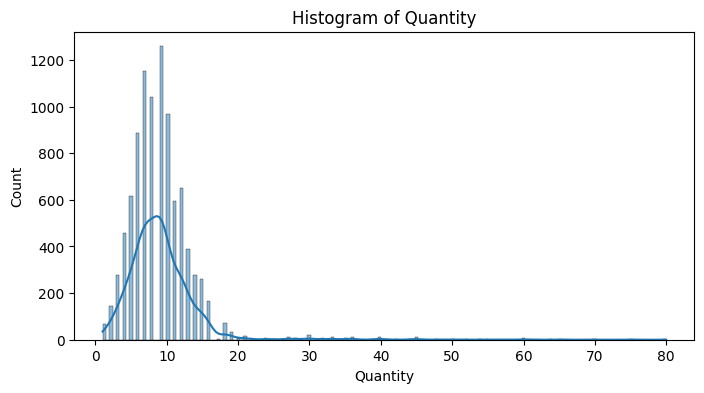

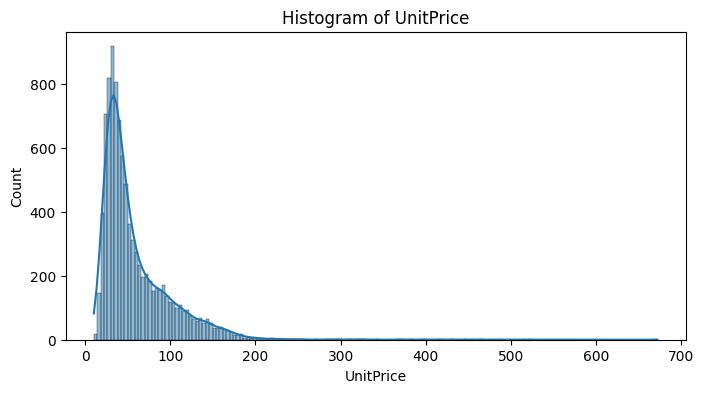

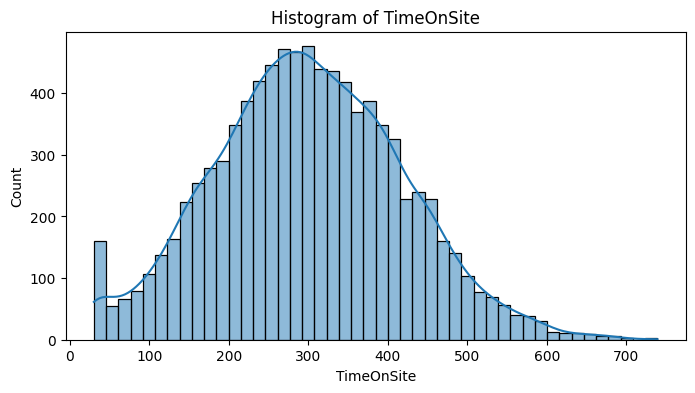

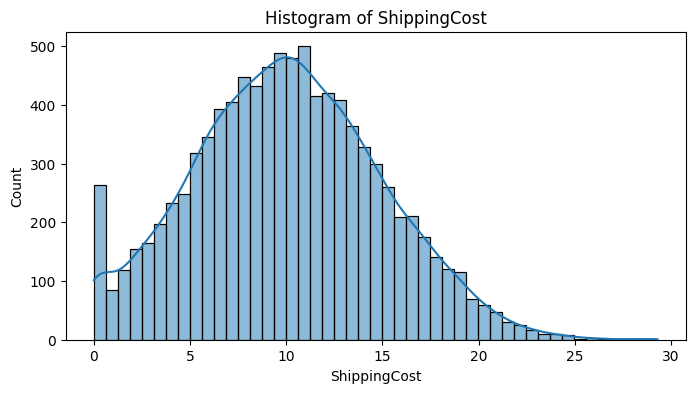

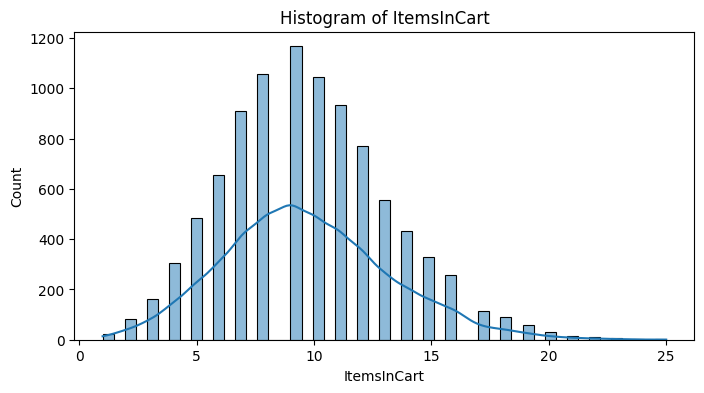

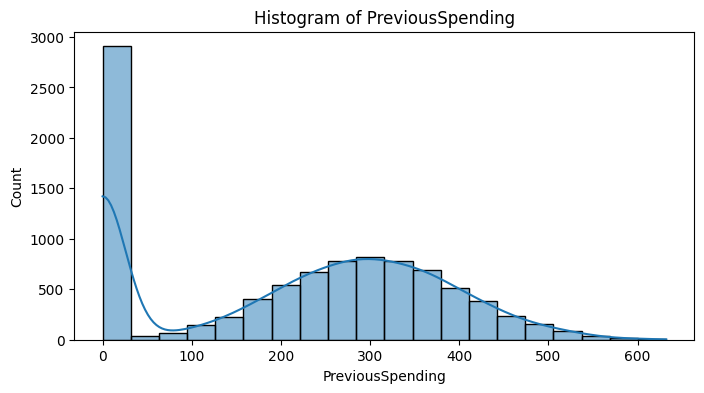

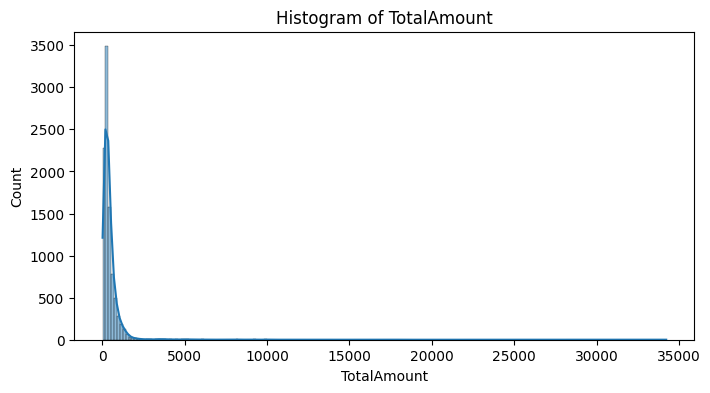

In [38]:
# histogram for numerical columns with exception of review rating and history of previous purchases
num_cols =['Quantity', 'UnitPrice', 'TimeOnSite', 'ShippingCost', 'ItemsInCart', "PreviousSpending", 'TotalAmount']
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(retail_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()


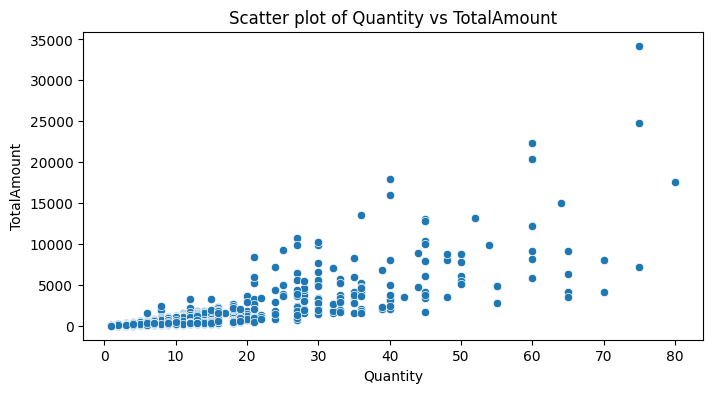

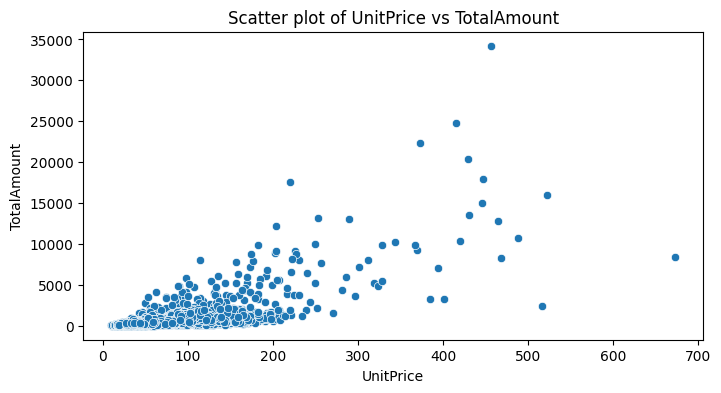

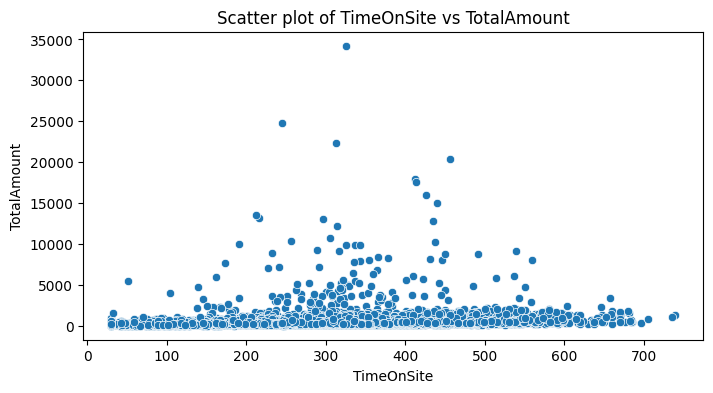

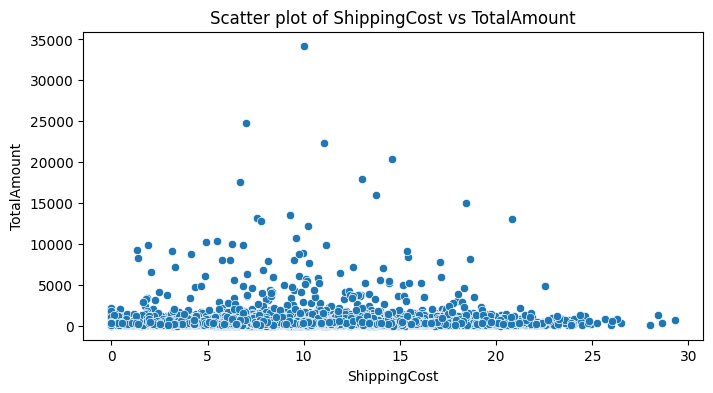

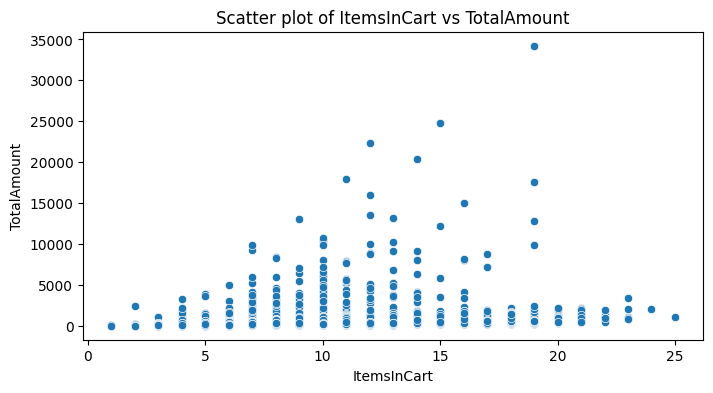

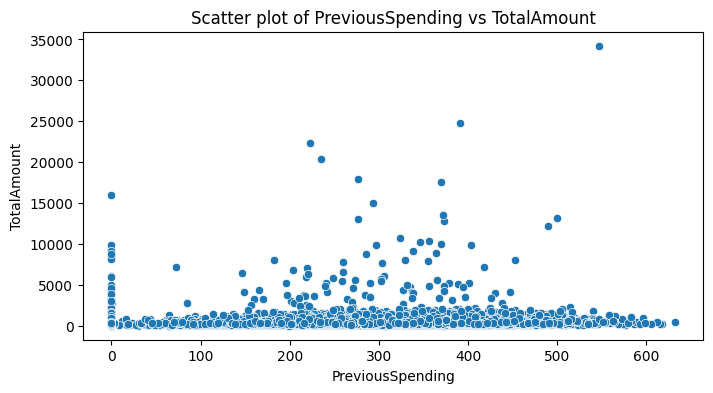

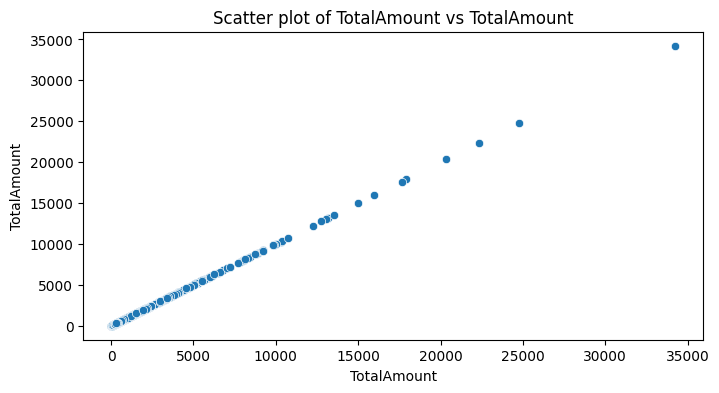

In [39]:
# draw a scatter plot between each numerical column and TotalAmount
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=retail_df[col], y=retail_df["TotalAmount"])
    plt.title(f'Scatter plot of {col} vs TotalAmount')
    plt.show()

In [40]:
# calculate correlation  cofficienct of numerical variables with total amount
num_cols = retail_df[num_cols]
correlation = num_cols.corr()
print(correlation)

                  Quantity  UnitPrice  TimeOnSite  ShippingCost  ItemsInCart  \
Quantity          1.000000   0.321691    0.413870      0.006226     0.648289   
UnitPrice         0.321691   1.000000    0.118571      0.009159     0.086206   
TimeOnSite        0.413870   0.118571    1.000000      0.003955     0.588837   
ShippingCost      0.006226   0.009159    0.003955      1.000000     0.004380   
ItemsInCart       0.648289   0.086206    0.588837      0.004380     1.000000   
PreviousSpending  0.377318  -0.007934   -0.002807      0.005132     0.542788   
TotalAmount       0.715554   0.626243    0.157917      0.012642     0.228472   

                  PreviousSpending  TotalAmount  
Quantity                  0.377318     0.715554  
UnitPrice                -0.007934     0.626243  
TimeOnSite               -0.002807     0.157917  
ShippingCost              0.005132     0.012642  
ItemsInCart               0.542788     0.228472  
PreviousSpending          1.000000     0.108856  
TotalAmou

In [41]:
# hypothesis testing
# Hypothesis 0: There is no significant difference in TotalAmount spent between customers based on quanity and Unit Price.
# Hypothesis 1: There is significant difference in TotalAmount spent between customers based on quanity and Unit Price.
from scipy import stats
alpha = 0.05
# correlation test
corr_quantity = retail_df['Quantity'].corr(retail_df['TotalAmount'])
corr_unitprice = retail_df['UnitPrice'].corr(retail_df['TotalAmount'])
print(f'Correlation between Quantity and TotalAmount: {corr_quantity}')
print(f'Correlation between UnitPrice and TotalAmount: {corr_unitprice}')

Correlation between Quantity and TotalAmount: 0.7155543380413902
Correlation between UnitPrice and TotalAmount: 0.6262429337546217


In [42]:
# model the total amount using linear regression model using Quantity and Unit Price as independent variables
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  

In [43]:
# model the total amount using linear regression model using Quantity and Unit Price as independent variables
X = retail_df[['Quantity', 'UnitPrice']]
y = retail_df['TotalAmount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# model the total amount using linear regression model using Quantity and Unit Price as independent variables --- IGNORE ---
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
# model the total amount using linear regression model using Quantity and Unit Price as independent variables --- IGNORE ---
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')
# model the total amount using linear regression model using Quantity and Unit Price as independent variables --- IGNORE ---
# Predicting TotalAmount for new data
new_data = pd.DataFrame({'Quantity': [2, 5], 'UnitPrice': [20.0, 15.0]})
predictions = model.predict(new_data)
print(f'Predictions for new data: {predictions}')

Mean Squared Error: 422196.5268044104
R-squared: 0.6168551330482075
Intercept: -994.0500673098105
Coefficients: [99.38256171  9.69524337]
Predictions for new data: [-601.38007658 -351.70860826]


In [ ]:
#running ANOVA test for total amount against categorical column 'ProductCategory'
from scipy import stats
categorical_col = 'ProductCategory'
for col in numeric_cols:
    groups = [retail_df[col][retail_df[categorical_col] == category] for category in retail_df[categorical_col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f'ANOVA results for {col} by {categorical_col}: F-statistic = {f_stat}, p-value = {p_value}')
    if p_value < 0.05:
        print(f'There is a significant difference in {col} across different {categorical_col} categories.')


ANOVA results for Quantity by ProductCategory: F-statistic = 0.3897746943021897, p-value = 0.8561584657281427
ANOVA results for UnitPrice by ProductCategory: F-statistic = 2509.3684817882418, p-value = 0.0
There is a significant difference in UnitPrice across different ProductCategory categories.
ANOVA results for DiscountApplied by ProductCategory: F-statistic = 0.8108893583856825, p-value = 0.5416360848303667
ANOVA results for ReviewRating by ProductCategory: F-statistic = nan, p-value = nan
ANOVA results for IsFirstPurchase by ProductCategory: F-statistic = 0.32473729091640624, p-value = 0.8983558357484501
ANOVA results for TimeOnSite by ProductCategory: F-statistic = nan, p-value = nan
ANOVA results for ShippingCost by ProductCategory: F-statistic = 0.8179960977979795, p-value = 0.5365685246195919
ANOVA results for ItemsInCart by ProductCategory: F-statistic = 0.3940463040527507, p-value = 0.8532338889418324
ANOVA results for PreviousSpending by ProductCategory: F-statistic = 0.202

In [ ]:
#running ANOVA test between continous variables against categorical variables column 'ProductCategory'
import scipy.stats as stats
categorical_col = 'ProductCategory'
for col in numeric_cols:
    groups = [retail_df[col][retail_df[categorical_col] == category] for category in retail_df[categorical_col].unique()]
    f_stat, p_value = stats.f_oneway(*groups)
    print(f'ANOVA results for {col} by {categorical_col}: F-statistic = {f_stat}, p-value = {p_value}')
    if p_value < 0.05:
        print(f'There is a significant difference in {col} across different {categorical_col} categories.')


ANOVA results for Quantity by ProductCategory: F-statistic = 0.3897746943021897, p-value = 0.8561584657281427
ANOVA results for UnitPrice by ProductCategory: F-statistic = 2509.3684817882418, p-value = 0.0
There is a significant difference in UnitPrice across different ProductCategory categories.
ANOVA results for DiscountApplied by ProductCategory: F-statistic = 0.8108893583856825, p-value = 0.5416360848303667
ANOVA results for ReviewRating by ProductCategory: F-statistic = nan, p-value = nan
ANOVA results for IsFirstPurchase by ProductCategory: F-statistic = 0.32473729091640624, p-value = 0.8983558357484501
ANOVA results for TimeOnSite by ProductCategory: F-statistic = 1.1118066647458116, p-value = 0.35159710396004124
ANOVA results for ShippingCost by ProductCategory: F-statistic = 0.8179960977979795, p-value = 0.5365685246195919
ANOVA results for ItemsInCart by ProductCategory: F-statistic = 0.3940463040527507, p-value = 0.8532338889418324
ANOVA results for PreviousSpending by Produ